# Car Price Prediction 
                    - Krashna Gurme
                    
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a new/old car price. 

For the purposes of this project, the following preprocessing steps have been made to the dataset:

There are 8 features in total. They are 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', and 'owner'. There are 4380 total observations or data instances.  There is feature called 'year' which is important to calculate the age of car. We have also done One-hot encoding for features like 'fuel', 'seller-type', 'transmission' and 'owner'.  

In [2]:
# Importing necessary packages 
import pandas as pd
import numpy as np

In [3]:
# Importing a data file using pandas
df=pd.read_csv('car data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Checking dimesionality of a dataframe
df.shape

(4340, 8)

In [5]:
# Printing the uniques values from each feature
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
# Checking out all the uniques values from each feature
feature_list = df.columns.values.tolist()
for feature_name in feature_list:
    print("\nFeature Name = ", feature_name)
    print(df[feature_name].unique())


Feature Name =  name
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']

Feature Name =  year
[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]

Feature Name =  selling_price
[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399

In [7]:
# Checking Null Values  or missing values 
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

So, there is no any count so no null values.

In [8]:
# Information
df.info()

#To check if there are any outliers
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
90%,2018.000000,9.000000e+05,120000.000000
95%,2019.000000,1.300000e+06,140000.000000
99%,2020.000000,3.200000e+06,220000.000000


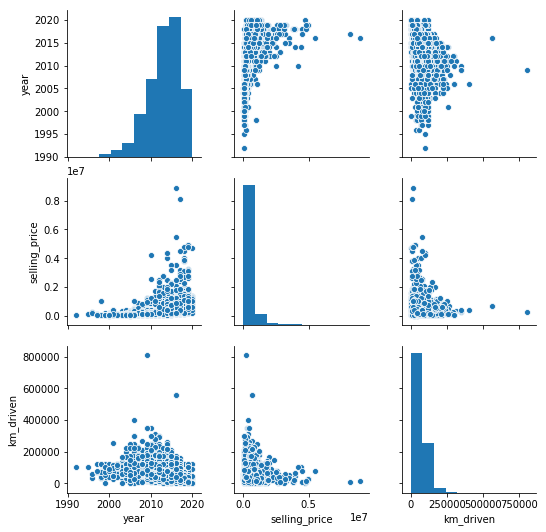

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

sns.pairplot(df)

In [10]:
# Finding feature names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

There is no need of feature 'name', so we are dropping it. 

In [11]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]

In [12]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


* To find out the how old the car is we're gonna add one extra feature as 'current_year' and then subtract the year feature
    from the same.

In [13]:
final_dataset['current_year']=2020
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [14]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


- Final_dataset.drop(['year'],axis=1,inplace=True). To make operation happen in permanent so inplace = True


In [15]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [16]:
final_dataset.drop(['current_year'],axis=1,inplace=True)
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [17]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


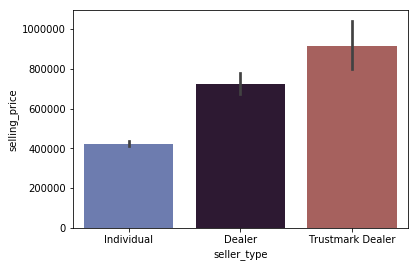

In [19]:
sns.barplot('seller_type','selling_price',data=final_dataset,palette='twilight')

Selling Price is high when dealer is 'Trustmark' 

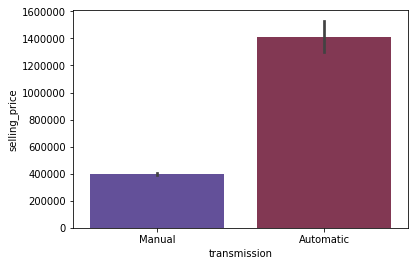

In [20]:
sns.barplot('transmission','selling_price',data=final_dataset,palette='twilight')

Selling price of car whihc is having automatic transmission is high than manual transmission car.

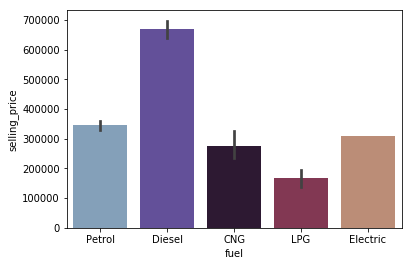

In [21]:
sns.barplot('fuel','selling_price',data=final_dataset,palette='twilight')

Seeling price of a car having Diesel fuel type is higher than any other fuel type car.

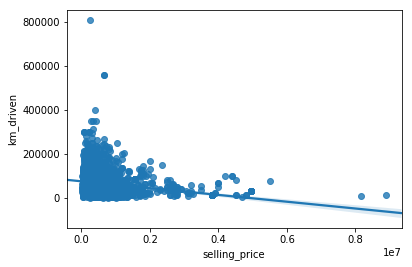

In [22]:
sns.regplot('selling_price','km_driven',data=final_dataset)

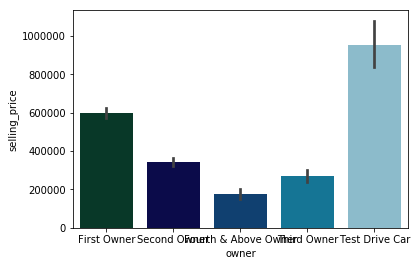

In [23]:
sns.barplot('owner','selling_price',data=final_dataset, palette='ocean')

The Test Drive Car has higher price figure than any other car owner type.

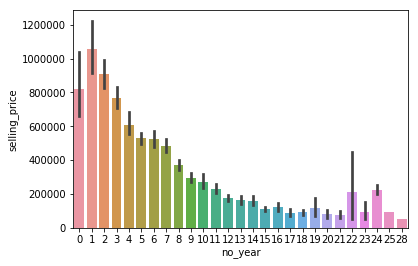

In [24]:
sns.barplot('no_year','selling_price',data=final_dataset)

Selling Price of cars 1 year old is high and gradually decreasing with the incresing age of car till 28 

# Outliers

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

In [25]:
Q1 = final_dataset.quantile(0.25)
Q3 = final_dataset.quantile(0.75)
IQR = Q3 - Q1
print("Showing IQR for each numeric value feature/column\n")
print(IQR)

Showing IQR for each numeric value feature/column

selling_price    391250.25
km_driven         55000.00
no_year               5.00
dtype: float64


- We now have the IQR scores, it’s time to get hold on outliers. 
- The below code will give an output with some true and false values. The data point where we have False that means these       values are valid whereas True indicates presence of an outlier.

In [26]:
print(final_dataset < (Q1 - 1.5 * IQR)) |(final_dataset > (Q3 + 1.5 * IQR))

       fuel  km_driven  no_year  owner  seller_type  selling_price  \
0     False      False    False  False        False          False   
1     False      False    False  False        False          False   
2     False      False    False  False        False          False   
3     False      False    False  False        False          False   
4     False      False    False  False        False          False   
...     ...        ...      ...    ...          ...            ...   
4335  False      False    False  False        False          False   
4336  False      False    False  False        False          False   
4337  False      False    False  False        False          False   
4338  False      False    False  False        False          False   
4339  False      False    False  False        False          False   

      transmission  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
4335        

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

- Now, we will calculate the Z_score for each numeric column

In [27]:
from scipy import stats

z_score_selling_price = np.abs(stats.zscore(final_dataset['selling_price']))
print("\n Z Score for selling_price :",z_score_selling_price)

z_score_km_driven = np.abs(stats.zscore(final_dataset['km_driven']))
print("\n Z Score for Km_Driven :",z_score_km_driven)

z_score_no_year = np.abs(stats.zscore(final_dataset['no_year']))
print("\n Z Score for no_year  :", z_score_no_year)


 Z Score for selling_price : [0.76774602 0.63809636 0.16573147 ... 0.68131292 0.62382691 0.48251678]

 Z Score for Km_Driven : [0.08113906 0.3476891  0.7243813  ... 0.35987736 0.50996722 0.56210318]

 Z Score for no_year  : [1.44507431 1.44507431 0.2587948  ... 0.97056251 0.69022881 0.69022881]


Looking the code and the output above, it is difficult to say which data point is an outlier. 
Let’s try and define a threshold to identify an outlier.

In [28]:
threshold = 3
print(np.where(z_score_selling_price > 3))

(array([  89,   96,  101,  102,  105,  163,  204,  527,  539,  553,  555,
        563,  572,  574,  582,  591,  593,  601,  610,  612,  620,  731,
        770,  836,  898,  900,  908,  917,  919,  927,  959,  963,  968,
        988, 1021, 1023, 1026, 1031, 1065, 1088, 1107, 1156, 1288, 1290,
       1303, 1410, 1441, 1479, 1623, 1646, 1705, 1834, 1836, 1844, 1915,
       1977, 2178, 2237, 2239, 2247, 2256, 2258, 2266, 2295, 2323, 2503,
       2574, 2580, 2582, 2616, 2737, 2739, 2747, 3064, 3065, 3066, 3261,
       3453, 3596, 3721, 3851, 3863, 3872, 3873, 3875, 3883, 3969, 4047,
       4186, 4224, 4304, 4313], dtype=int64),)


In [29]:
print(z_score_selling_price[89])

13.217129731268988


# IQR Score-
Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [30]:
final_dataset.shape

(4340, 7)

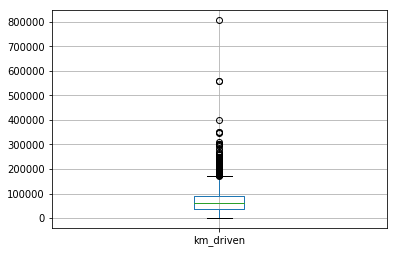

In [31]:
final_dataset.boxplot(column=['km_driven'])

In [32]:
final_data = final_dataset[~((final_dataset < (Q1 - 1.5 * IQR)) |(final_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
final_data.shape

(3858, 7)

* As you can see post removing the outliers from the data we've now 522 rows less in dataset. 

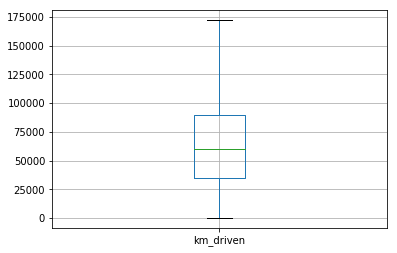

In [33]:
final_data.boxplot(column=['km_driven'])

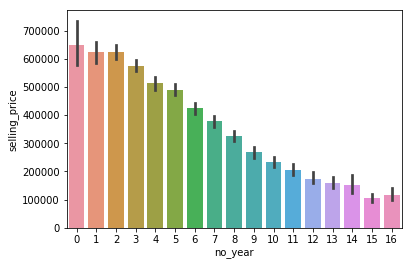

In [34]:
sns.barplot('no_year','selling_price',data=final_data)

# Dealing With Categorical Variables

> We're dropping the first coulum so not to get in dummy variable trap. And also avoiding the extra computation.
> drop_first = True 

In [35]:
final_data=pd.get_dummies(final_data, drop_first=True)  

In [36]:
final_data.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


* As you can see due to drop_first = True, we didn't get the Fuel Type 'fuel_CNG'
* These are the initial Fuel Categories - 'Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'

In [37]:
final_data.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.281465,-0.633056,0.332844,-0.005951,-0.070075,-0.311107,-0.215533,0.176674,-0.205949,-0.107292,-0.209383,0.115458,-0.176826
km_driven,-0.281465,1.000000,0.496905,0.336045,-0.000297,0.061431,-0.347346,0.213036,-0.104681,0.118956,0.118595,0.246187,-0.096672,0.196615
no_year,-0.633056,0.496905,1.000000,-0.067870,0.031319,0.052634,0.059871,0.135268,-0.097109,0.092402,0.132050,0.302163,-0.100146,0.233907
fuel_Diesel,0.332844,0.336045,-0.067870,1.000000,-0.015059,-0.070825,-0.967784,-0.006649,-0.022580,0.072262,0.000026,0.029898,-0.021877,0.010101
fuel_Electric,-0.005951,-0.000297,0.031319,-0.015059,1.000000,-0.001219,-0.016663,-0.028330,-0.002474,-0.061301,-0.002024,0.027020,-0.000972,-0.004211
fuel_LPG,-0.070075,0.061431,0.052634,-0.070825,-0.001219,1.000000,-0.078368,0.035030,-0.011637,0.019892,0.018302,0.025322,-0.004570,0.008318
fuel_Petrol,-0.311107,-0.347346,0.059871,-0.967784,-0.016663,-0.078368,1.000000,0.001346,0.027564,-0.078615,-0.012687,-0.038684,0.023813,-0.010013
seller_type_Individual,-0.215533,0.213036,0.135268,-0.006649,-0.028330,0.035030,0.001346,1.000000,-0.270365,0.142919,0.061686,0.180912,-0.106179,0.136327
seller_type_Trustmark Dealer,0.176674,-0.104681,-0.097109,-0.022580,-0.002474,-0.011637,0.027564,-0.270365,1.000000,-0.008825,-0.019314,-0.075867,-0.009274,-0.040190
transmission_Manual,-0.205949,0.118956,0.092402,0.072262,-0.061301,0.019892,-0.078615,0.142919,-0.008825,1.000000,0.015964,0.038984,-0.001692,0.016986


* After seeing the different correaltion values with different feature, we can remove the features whcih are Highly correlated to each other can be removed. But in our case there is very less features avalaibles. So we're not removing any features. :) 
Also we can see there are some features which are positively correlated ans some are negatively correlated.

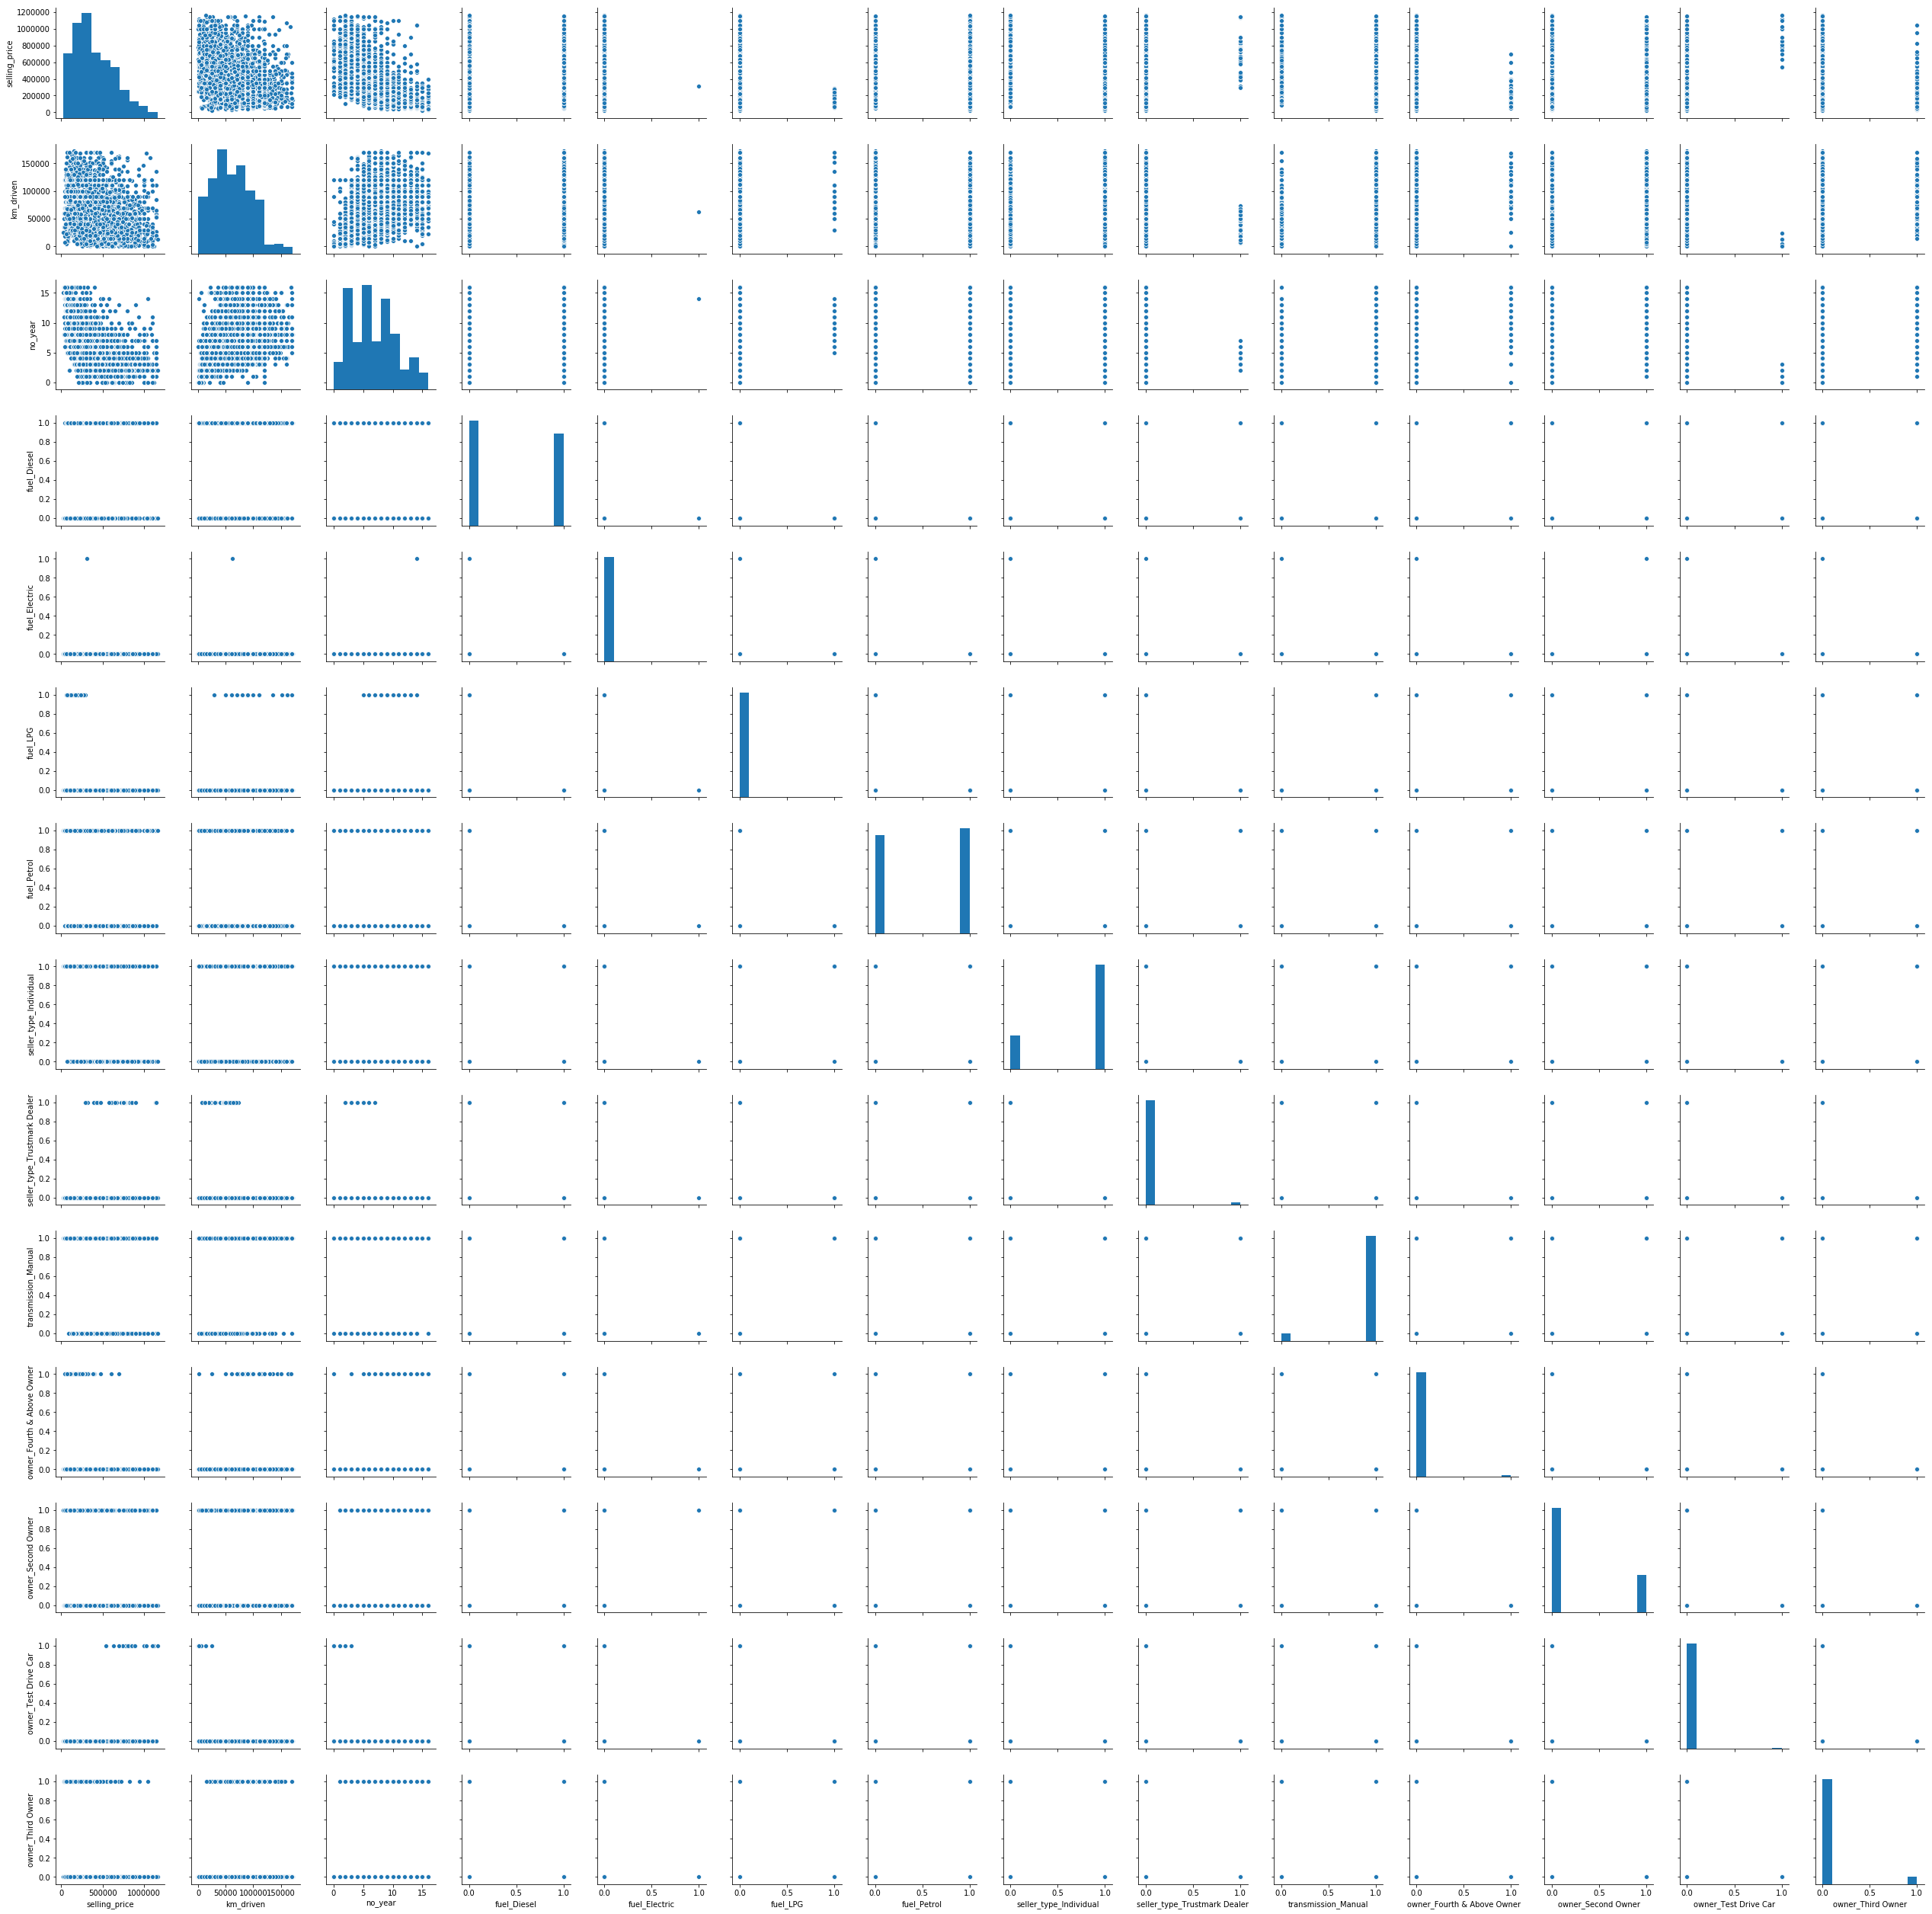

In [38]:
# Seeing the Correlation in visualized manner 
import seaborn as sns 
sns.pairplot(final_data)

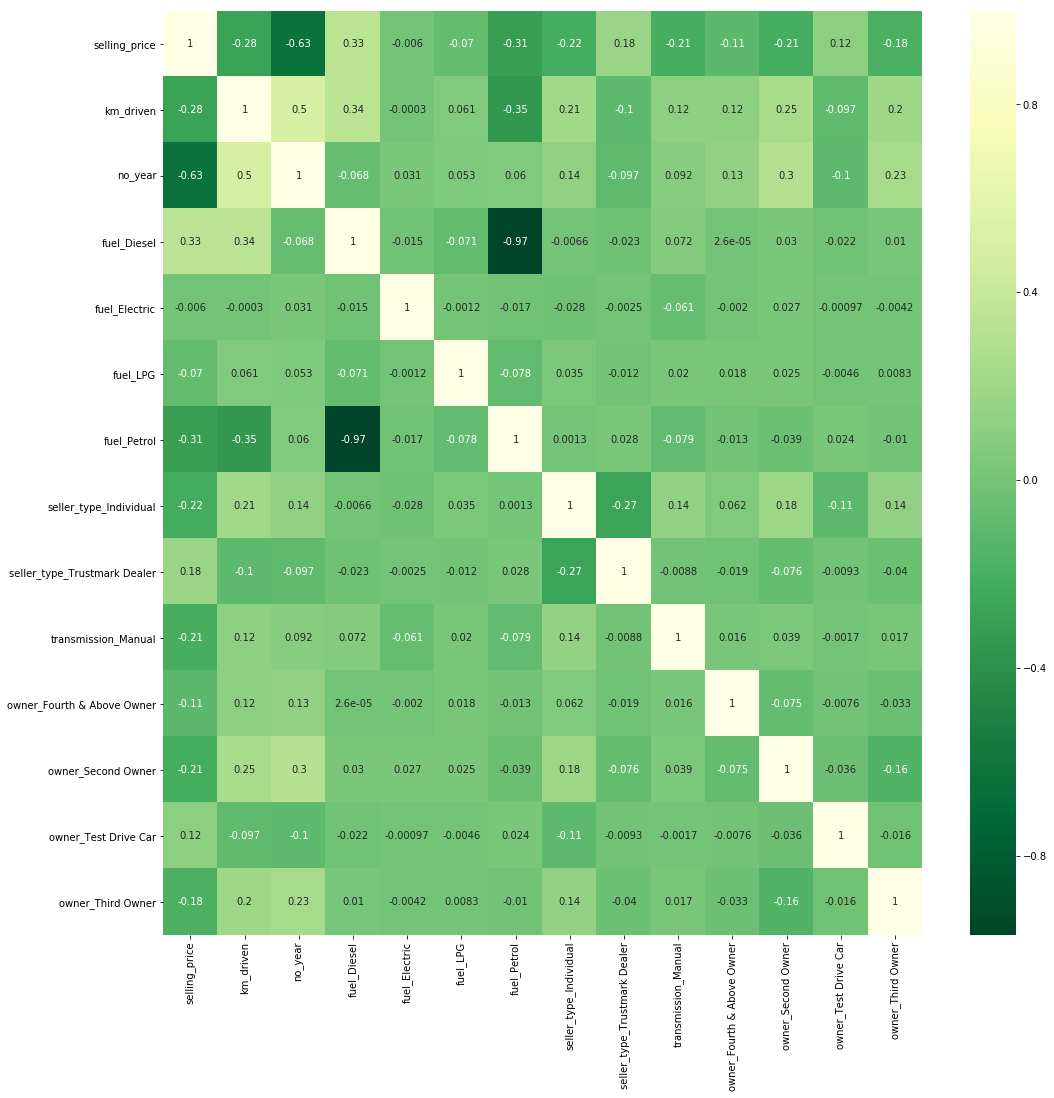

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline

car_corr = final_data.corr()
top_corr_features = car_corr.index
plt.figure(figsize=(17, 17))
# plot heat map
g = sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="YlGn_r")

If correlation is < 0.8 or > 0.8 you will be able to drop the features as both features are same 

In [40]:
final_data.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [41]:
# Setting up the variables for the model building (Independent and Dependent features)
X=final_data.iloc[:,1:]  # Taking all the features excluding zeroth index feature i.e. selling price
y=final_data.iloc[:,0]  # Dependent Feature - Selling Price 
print('Independent Features')
print(X)
print('\n Dependent Variable')
print(y)

Independent Features
      km_driven  no_year  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0         70000       13            0              0         0            1   
1         50000       13            0              0         0            1   
2        100000        8            1              0         0            0   
3         46000        3            0              0         0            1   
4        141000        6            1              0         0            0   
...         ...      ...          ...            ...       ...          ...   
4335      80000        6            1              0         0            0   
4336      80000        6            1              0         0            0   
4337      83000       11            0              0         0            1   
4338      90000        4            1              0         0            0   
4339      40000        4            0              0         0            1   

      seller_type_Individual  

In [42]:
X.columns

Index(['km_driven', 'no_year', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [43]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [44]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [45]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [46]:
print(etr.feature_importances_)

[2.48915126e-01 4.96358347e-01 1.22143894e-01 2.47092502e-05
 1.67529288e-04 1.31540780e-03 2.02943715e-02 2.70141607e-02
 4.38865432e-02 3.47887921e-03 2.09006142e-02 6.81118294e-03
 8.68923561e-03]


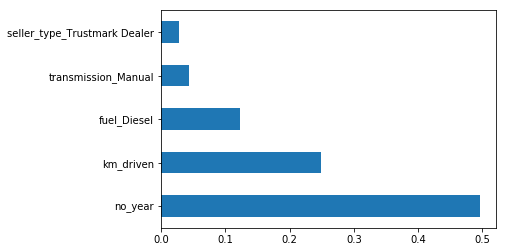

In [47]:
# plot graph of features importances for better visualization
feat_importance = pd.Series(etr.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')   # taking top 5 importanant feature just for showing 
plt.show()

# Splitting Data For Training and Testing purpose 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  

In [49]:
X_train.shape

(3086, 13)

# Model Building 

In [50]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# print the coefficients
print("Intercept", lr_model.intercept_)
print("Coeff.", lr_model.coef_)


Intercept 714825.9519284698
Coeff. [-5.24076819e-01 -3.39467484e+04  2.17169306e+05 -2.91038305e-11
  2.52327267e+04  4.34884967e+04 -2.73709512e+04  1.75877109e+05
 -1.63250987e+05 -5.69246163e+04 -9.46944159e+03  2.35343129e+05
 -3.64790209e+04]


# Predictions 

In [51]:
# Predictions

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = lr_model.predict(X_test)
predictions

# The coefficients
print('Coefficients: \n', lr_model.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, predictions))

Coefficients: 
 [-5.24076819e-01 -3.39467484e+04  2.17169306e+05 -2.91038305e-11
  2.52327267e+04  4.34884967e+04 -2.73709512e+04  1.75877109e+05
 -1.63250987e+05 -5.69246163e+04 -9.46944159e+03  2.35343129e+05
 -3.64790209e+04]
Mean squared error: 26447510947.49
Coefficient of determination: 0.54


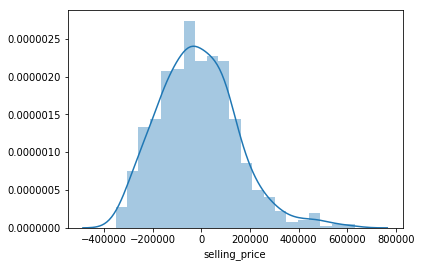

In [52]:
# We're doing actual values - predicted values to check what our algorithm is predicting.
sns.distplot(y_test-predictions)

* As you can see we're getting the Normal Distribution Curve, which indicates that our model is giving very good accuracy.
* There is very little difference in between the predicted and actual values so we're getting almost nearly normal distribution in above graph. 

In [53]:
df_1 = pd.DataFrame({'Actual':y_test,"Predicted":predictions})
df_1.head()

,Actual,Predicted
1140,250000,239897.879630
3207,1150000,662998.286983
2751,80000,56209.969668
435,250000,436909.795701
38,900000,568952.662895


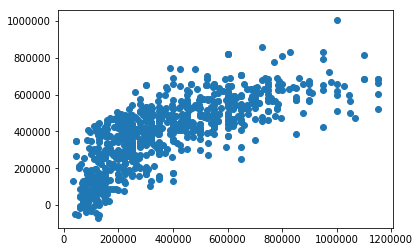

In [54]:
plt.scatter(y_test, predictions)

In [55]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2

0.5416875483755773

In [56]:
# print the R-squared value for the model
lr_model.score(X, y)

0.5450021422794624

In [57]:
# Produce a matrix for client data
'''km_driven', 'no_year', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'''

new_data = [[1000, 5, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], # Client 1
            [10000, 10, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], # Client 2
            [70000, 13, 0, 0 , 0, 1, 1, 0, 1, 0, 0, 0, 0], # Client 3
            [50000, 13, 0, 0,0,1,1,0,1,0,0,0,0]]
# Predictions
for i, SellingPrice in enumerate(lr_model.predict(new_data)):
    print ("Predicted selling Car Price for Client {}'is : ${:,.2f}".format(i+1, SellingPrice))


Predicted selling Car Price for Client 1'is : $1,009,706.69
Predicted selling Car Price for Client 2'is : $333,277.31
Predicted selling Car Price for Client 3'is : $89,699.40
Predicted selling Car Price for Client 4'is : $100,180.94


In [58]:
# calculate MAE, MSE, RMSE
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

128256.69679757858
26447510947.491642
162626.90720631578


In [63]:
# Creating a Pickle file of a builded model.
# Open a file, where you want to store the data
import pickle 
file = open('Linear_Regression_Model.pkl', 'wb')

# Dump information to that file
pickle.dump(lr_model, file)

Check post executing the above pickle formation code, one pickle file is get created in the working folder.

# Conclusions

* Car age is effecting negatively as older the car lesser the Selling Price.
* Car with fuel type as Diesel has higher selling price.
* Car with automatic transmission has higher selling price than of manual transmission.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.

# Thank You.! :) 